# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score
from mpl_toolkits.mplot3d import Axes3D

# Load Wholesale Customers Dataset

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
df = pd.read_csv(url)

# Drop categorical columns (Region & Channel) for clustering

In [3]:
X = df.iloc[:, 2:].values  # Using only numerical features

# Standardize features for better clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Finding the Optimal Number of Clusters (Elbow Method)

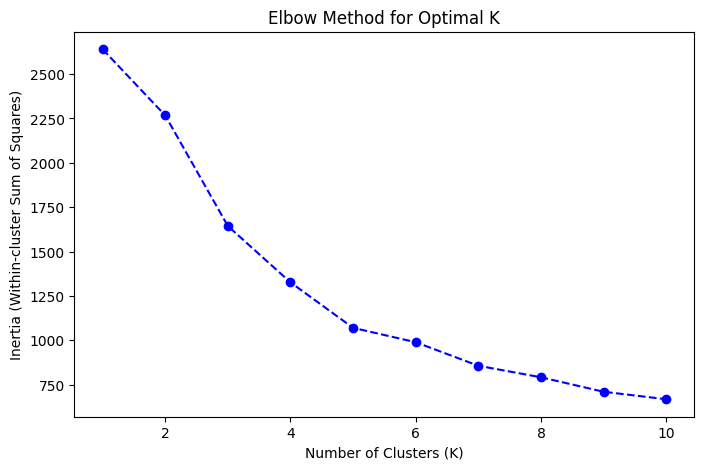

In [4]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker="o", linestyle="--", color="blue")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.show()

# Train K-Means Model (Using K=4 based on Elbow Method)

In [5]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the dataset
df["Cluster"] = clusters

# Evaluate Cluster Quality (Silhouette Score)

In [6]:
sil_score = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {sil_score:.2f} (Higher is better)")

Silhouette Score: 0.35 (Higher is better)


# PCA for Dimensionality Reduction (2D Visualization)

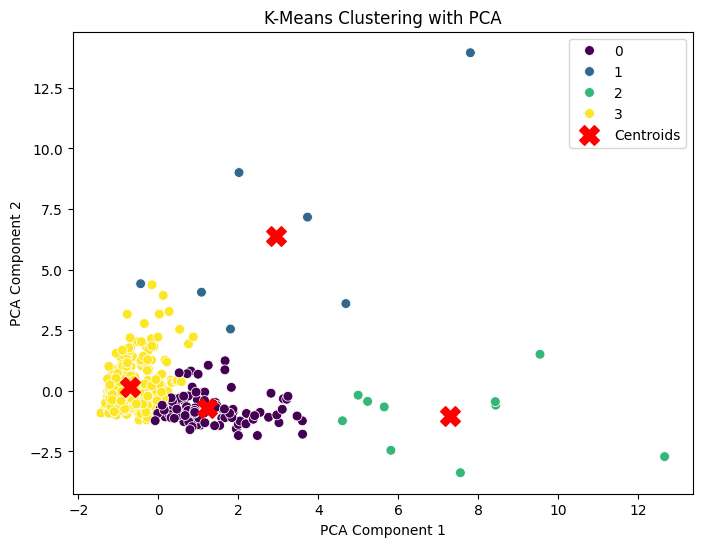

In [7]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette="viridis", s=50)
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], pca.transform(kmeans.cluster_centers_)[:, 1], c="red", s=200, marker="X", label="Centroids")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clustering with PCA")
plt.legend()
plt.show()

# Alternative Clustering Method: Gaussian Mixture Model (GMM)

In [8]:
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_clusters = gmm.fit_predict(X_scaled)
df["GMM_Cluster"] = gmm_clusters

gmm_sil_score = silhouette_score(X_scaled, gmm_clusters)
print(f"Silhouette Score (GMM): {gmm_sil_score:.2f}")

Silhouette Score (GMM): 0.16


# Density-Based Clustering (DBSCAN)

In [9]:
dbscan = DBSCAN(eps=1.2, min_samples=5)  # Tuned parameters
dbscan_clusters = dbscan.fit_predict(X_scaled)
df["DBSCAN_Cluster"] = dbscan_clusters

# Evaluating Clustering Consistency (Adjusted Rand Index)

In [10]:
ari_kmeans_gmm = adjusted_rand_score(df["Cluster"], df["GMM_Cluster"])
ari_kmeans_dbscan = adjusted_rand_score(df["Cluster"], df["DBSCAN_Cluster"])

print(f"Adjusted Rand Index (K-Means vs. GMM): {ari_kmeans_gmm:.2f}")
print(f"Adjusted Rand Index (K-Means vs. DBSCAN): {ari_kmeans_dbscan:.2f}")

Adjusted Rand Index (K-Means vs. GMM): 0.32
Adjusted Rand Index (K-Means vs. DBSCAN): 0.23


# Visualizing Cluster Distributions

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4660\3289061580.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Cluster", data=df, palette="coolwarm")


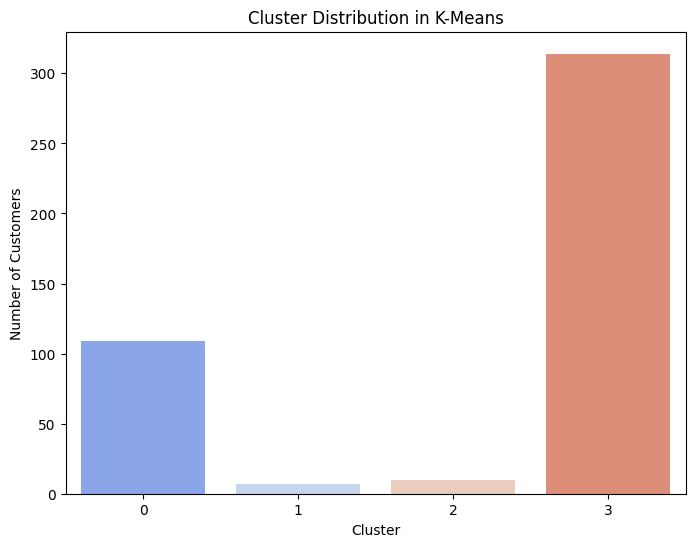

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Cluster", data=df, palette="coolwarm")
plt.title("Cluster Distribution in K-Means")
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.show()